# Compute summary statistics for DDPM samples

In [1]:
import torch
from utils import sample_plot_image, plot_pdf, plot_power_spectrum
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer


model = Unet(
    dim = 128,
    dim_mults = (1, 2, 4, 8),
    channels = 1
)

diffusion = GaussianDiffusion(
    model,
    image_size = 256,
    timesteps = 1000,           # number of steps
    sampling_timesteps = 250,   # number of sampling timesteps (using ddim for faster inference [see citation for ddim paper])
    loss_type = 'l1'            # L1 or L2
)

trainer = Trainer(
    diffusion,
    '/home/tda/DiffusionCosmo/maps',
    train_batch_size = 2,
    train_lr = 8e-5,
    train_num_steps = 10000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = False,                       # turn on mixed precision
    calculate_fid = True              # whether to calculate fid during training
)

# Uncomment to load previous milestone
trainer.load("10")

loading from version 1.5.4


In [2]:
# Show some sample images from DDPM
diffusion.model.eval()
with torch.no_grad():
    sampled_images = torch.cat([ diffusion.sample(batch_size = 2) for j in range(10)],dim=0)  # Make it in that way to avoid GPU memory problems
    #sampled_images = diffusion.sample(batch_size = 10)

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

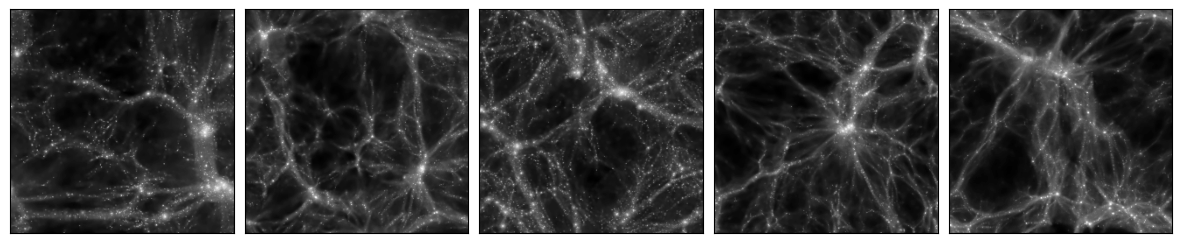

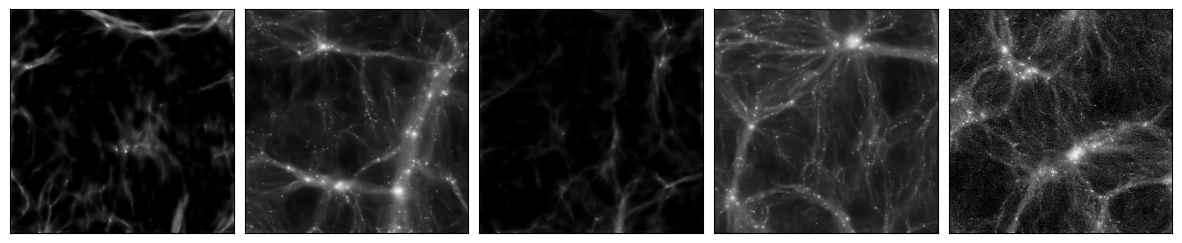

In [3]:
# Sample some real images
imgs_real = torch.cat([diffusion.unnormalize(trainer.ds[i]) for i in range(0,1000)])
imgs_gen = sampled_images.cpu().detach().squeeze()
imgs_real.shape, imgs_gen.shape

# Show some sample images from training dataset and generated by the DDPM
sample_plot_image(imgs_real, num_images=5)
sample_plot_image(imgs_gen, num_images=5)

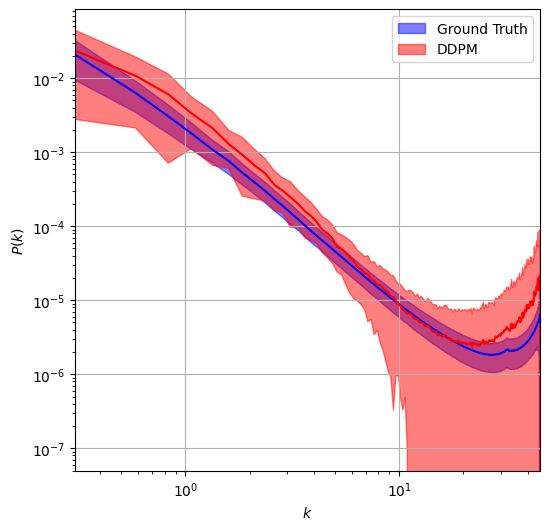

In [4]:
# Plot power spectrum
plot_power_spectrum(imgs_real, imgs_gen)

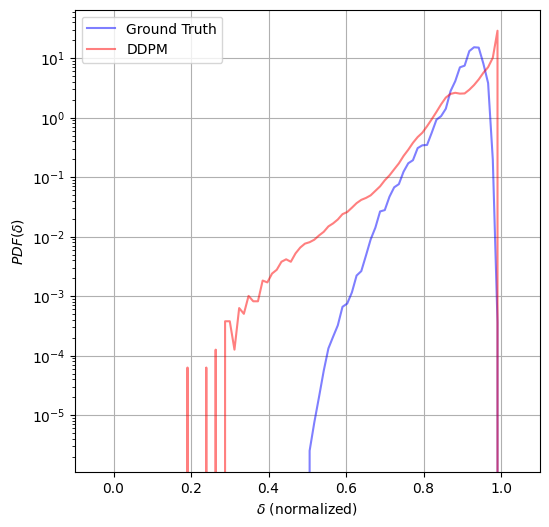

In [5]:
# Plot PDF
plot_pdf(imgs_real, imgs_gen)